<a href="https://colab.research.google.com/github/ZahirulNiloyCodes/CSE_422_Project/blob/main/Cse422_Project_Group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np

In [13]:
# @title Data Pre Processing
dataset=pd.read_csv('7.csv')
dataset=dataset.drop(columns=['Student ID'])
dataset=dataset.dropna(subset=['Diabetes',"Smoking"])
dataset=dataset.dropna(subset=["Gender"])
#print(dataset)
x_data=dataset.iloc[:,:-2].to_numpy()
y_nn=dataset.iloc[:,-2:].to_numpy()
y_1=dataset.iloc[:,-2].to_numpy()
y_2=dataset.iloc[:,-1].to_numpy()
#print(y_1)
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
transformer=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[4])],remainder='passthrough')
le=LabelEncoder()
x_data[:,1]=le.fit_transform(x_data[:,1])
#print(x_data)
x_data=np.array(transformer.fit_transform(x_data))
#print(x_data[:1,:])
y_1=le.fit_transform(y_1)
y_2=le.fit_transform(y_2)
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x_data[:,7:])
x_data[:,7:]=imputer.transform(x_data[:,7:])
x_data[:,5:6]=imputer.fit_transform(x_data[:,5:6])
print(x_data[:2,:])
x_data_panda=pd.DataFrame(x_data)
#print(x_data_panda)

[[0.0 0.0 1.0 0.0 0.0 26.03806328631338 1 152.06915679450026
  47.63094149562153 23.344401062476752 98.71497675065052 93.0 104.0 163.0]
 [1.0 0.0 0.0 0.0 0.0 32.0 0 182.5376635180374 55.74108278560672
  16.729017143841244 98.26029301637767 76.0 130.0 216.0]]


In [ ]:
# @title Data Splitting and Feature Scaling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_1,test_size=0.2,random_state=0.42)#Logistic Regression
x_train,x_test,y_train,y_test=train_test_split(x_data,y_2,test_size=0.2,random_state=0.42)


<Axes: title={'center': 'Data Preview'}, ylabel='Frequency'>

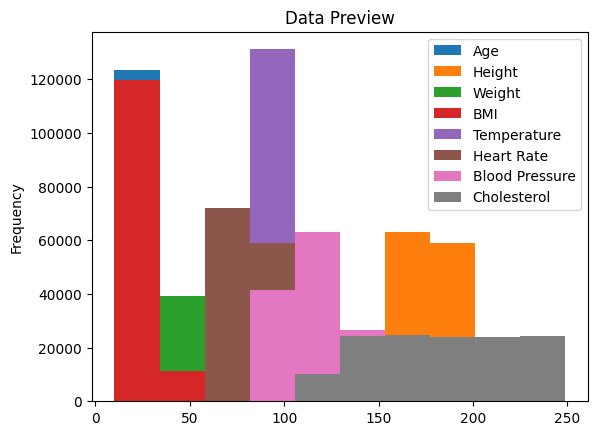

In [14]:
# @title Data Analysis
dataset.plot(kind='hist',title='Data Preview')

<Axes: xlabel='Diabetes', ylabel='Amount'>

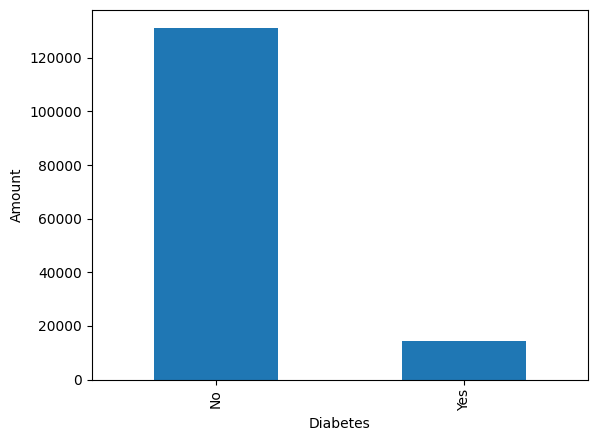

In [15]:
dataset['Diabetes'].value_counts().plot(kind='bar',ylabel='Amount')

<Axes: xlabel='Smoking', ylabel='Amount'>

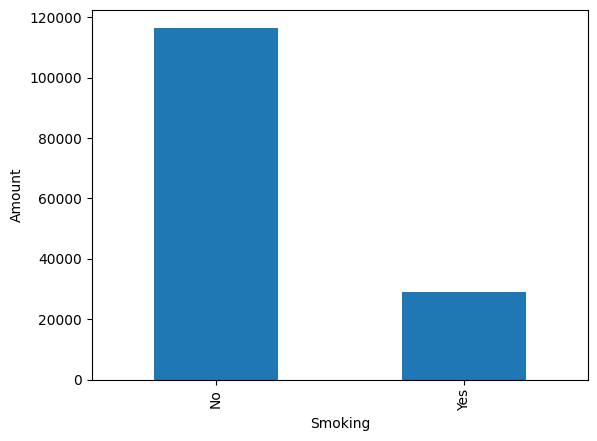

In [16]:
dataset['Smoking'].value_counts().plot(kind='bar',ylabel='Amount')

In [23]:
numerical_data=dataset.select_dtypes(include=['number'])
#print(numerical_data.columns.tolist())
numerical_data.describe()

,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,131150.000000,131037.000000,131237.000000,131203.000000,131198.000000,131083.000000,131188.000000,131281.000000
mean,26.038063,174.923119,69.977597,23.344401,98.601304,79.509402,114.590245,184.476451
std,4.893100,14.453735,17.340783,7.036895,0.500061,11.533476,14.417322,37.571193
min,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,22.000000,162.482673,54.969200,17.864808,98.265184,70.000000,102.000000,152.000000
50%,26.000000,174.787564,69.999667,22.698017,98.600049,80.000000,115.000000,184.000000
75%,30.000000,187.456700,84.979899,28.024113,98.940905,89.000000,127.000000,217.000000
max,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


In [24]:
categorical_data=dataset.select_dtypes(include=['object'])
#print(categorical_data.columns.tolist())
categorical_data.describe()

,Gender,Blood Type,Diabetes,Smoking
count,145755,131263,145755,145755
unique,2,4,2,2
top,Male,O,No,No
freq,72921,33193,131240,116597


In [26]:
numerical_data.var()

,0
Age,23.942432
Height,208.910458
Weight,300.702752
BMI,49.517894
Temperature,0.250061
Heart Rate,133.021080
Blood Pressure,207.859167
Cholesterol,1411.594511


In [27]:
numerical_data.skew()

,0
Age,-0.008618
Height,0.007335
Weight,0.003737
BMI,0.434649
Temperature,0.009709
Heart Rate,-0.002311
Blood Pressure,-0.005557
Cholesterol,0.004484
